# Scikit Learn - SVM classification

We will first explore SVM model to see how we can make predictions about classes(labels) of instances by training a model using an algorithm.

SVM (Support Vector Machine) is a learning algorithm based on max-margin principle to create a hyperplane to segregate instances based on observed variables, using parametric weights updated by minimizing loss function (hinge loss).

Let us explore the algorithm using a handwritten digits datasets.

Data:
 [[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
Target values:
 [0 1 2 3 4 5 6 7 8 9]
An image (8x8 pixel values):
 [[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


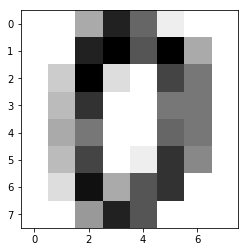

In [6]:
from sklearn import datasets, svm, metrics
import numpy as np
import matplotlib.pyplot as plt

digits = datasets.load_digits()

# Try printing out the data and see what are some of the values that we are going to deal with
print("Data:\n",digits.data)
print("Target values:\n", np.unique(digits.target))
print("An image (8x8 pixel values):\n", digits.images[0])
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

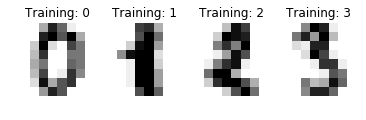

In [2]:
# The data that we are interested in is made of 8x8 images of digits
# The data has two member objects: images (hand written numbers) and target (actual number label)
# To get the sense of what the data looks like, try plotting 1~4 number images using matplotlib.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    
plt.show()


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  

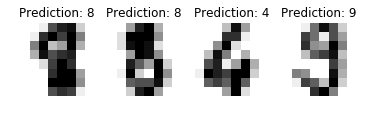

In [4]:
# To apply a classifier on this data, we need to flatten the image, 
# to turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)

# There are 1797 images data (each a vector of size 8)
# We convert these data into list of vectors
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier 
# SVM is one of the supervised learning algorithms based on maximum margin.
# We can set different parameters for the classifier (or default)
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits (trainset, labelled instances)
# We fit on data with the corresponding target labels
classifier.fit(data[:int(n_samples / 2)], digits.target[:int(n_samples / 2)])

# Now predict the value of the digit on the second half (testset, unlabelled instances)
expected = digits.target[int(n_samples / 2):] # true labels
predicted = classifier.predict(data[int(n_samples / 2):]) # predicted labels

# Interpret the results using metrics
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

# Let us see how the predictions have been made on testsets using SVM (trained with trainset)
images_and_predictions = list(zip(digits.images[int(n_samples / 2):], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()

# How well do you think has the machine learned how to distinguish numbers!?